# Titanic Survival Prediction

# Importing the libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
# lines below just to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Reading the dataset

In [2]:
titanic = pd.read_csv('tested.csv')

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [5]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [7]:
titanic['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

In [8]:
#check null values
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Handling with Missing Values

<AxesSubplot:>

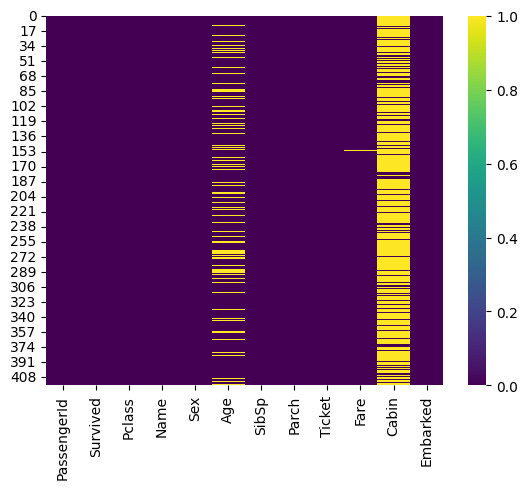

In [9]:
sns.heatmap(data = titanic.isnull(),cmap='viridis')

In [10]:
mean_value=titanic['Fare'].mean()
titanic['Fare'].fillna(mean_value,inplace=True)

In [11]:
titanic[['Pclass','Age']].groupby('Pclass').mean()

,Age
Pclass,
1,40.918367
2,28.777500
3,24.027945


In [12]:
def impute(pclass_Age):
    Age=pclass_Age[0]
    Pclass=pclass_Age[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 41
        elif Pclass==2:
            return 29
        else:
            return 24
    else :
        return Age

In [13]:
titanic['Age']=titanic[['Age','Pclass']].apply(impute,axis=1)

In [14]:
titanic['Age']

0      34.5
1      47.0
2      62.0
3      27.0
4      22.0
       ... 
413    24.0
414    39.0
415    38.5
416    24.0
417    24.0
Name: Age, Length: 418, dtype: float64

In [15]:
titanic.drop('Cabin',axis=1,inplace=True)

<AxesSubplot:>

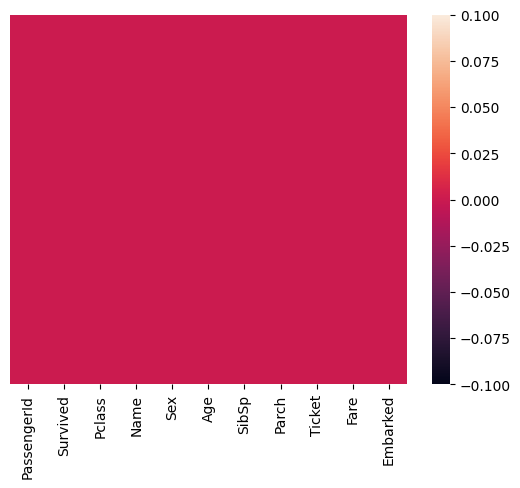

In [16]:
sns.heatmap(data=titanic.isnull(),yticklabels=False)

## Data Visualization

<AxesSubplot:xlabel='Survived', ylabel='count'>

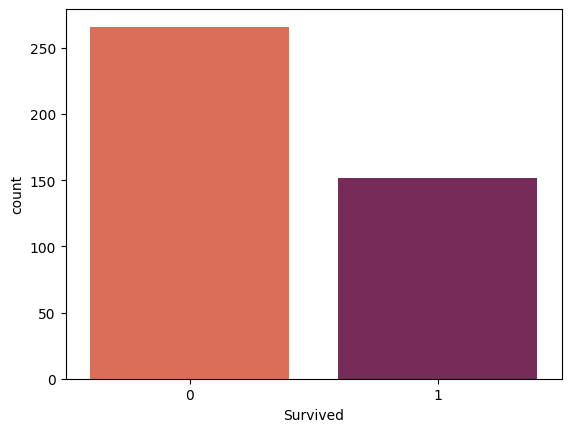

In [17]:
sns.countplot(x='Survived',data=titanic,palette='rocket_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

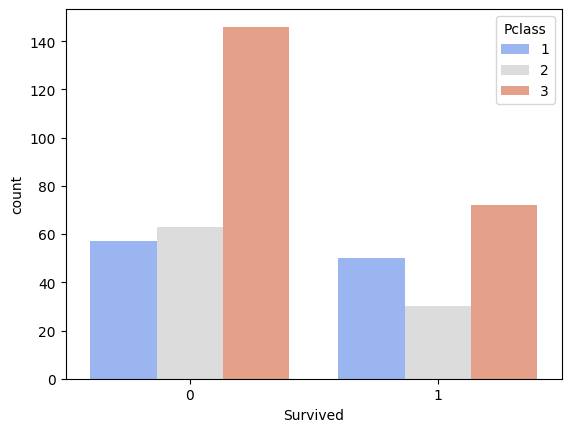

In [18]:
sns.countplot(x='Survived',hue='Pclass',data=titanic,palette='coolwarm')

<AxesSubplot:xlabel='Survived', ylabel='count'>

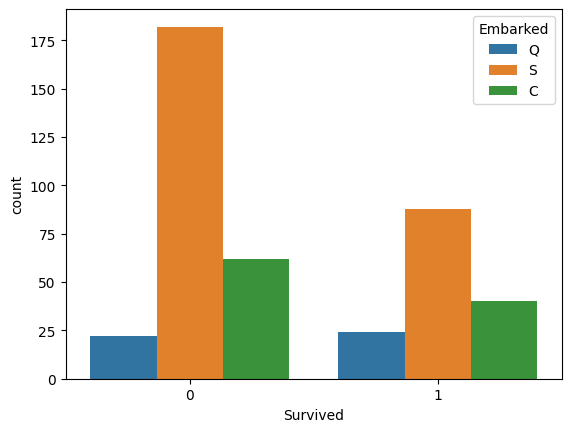

In [19]:
sns.countplot(x='Survived',hue='Embarked',data=titanic)

<AxesSubplot:xlabel='Age', ylabel='Density'>

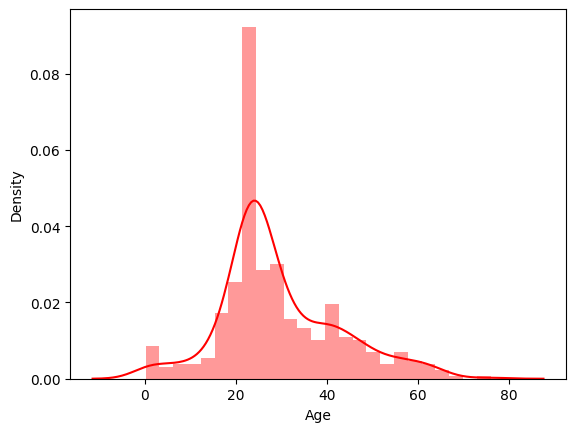

In [20]:
sns.distplot(titanic['Age'],kde=True,color='red',bins=25)

In [21]:
#Convert categorical data into 0's and 1's

In [23]:
sex=pd.get_dummies(titanic['Sex'])
sex.head()

,female,male
0,0,1
1,1,0
2,0,1
3,0,1
4,1,0


In [24]:
sex=pd.get_dummies(titanic['Sex'],drop_first=True)
sex.head()

,male
0,1
1,0
2,1
3,1
4,0


In [25]:
embark=pd.get_dummies(titanic['Embarked'])
embark.head(3)

,C,Q,S
0,0,1,0
1,0,0,1
2,0,1,0


In [26]:
titanic = pd.concat([titanic,sex,embark],axis=1)

In [27]:
#read first 5 rows
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,C,Q,S
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1,0,1,0
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0,0,0,1
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1,0,1,0
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,1,0,0,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0,0,0,1


In [29]:
# titanic['C'].value_counts()

In [30]:
titanic.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [31]:
titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,C,Q,S
0,892,0,3,34.5,0,0,7.8292,1,0,1,0
1,893,1,3,47.0,1,0,7.0000,0,0,0,1
2,894,0,2,62.0,0,0,9.6875,1,0,1,0
3,895,0,3,27.0,0,0,8.6625,1,0,0,1
4,896,1,3,22.0,1,1,12.2875,0,0,0,1


## Splitting the data

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
x=titanic.drop('Survived',axis=1)
y=titanic['Survived']

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [36]:
x_train

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,C,Q,S
118,1010,1,36.0,0,0,75.2417,1,1,0,0
271,1163,3,24.0,0,0,7.7500,1,0,1,0
114,1006,1,63.0,1,0,221.7792,0,0,0,1
311,1203,3,22.0,0,0,7.2250,1,1,0,0
131,1023,1,53.0,0,0,28.5000,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...
71,963,3,21.0,0,0,7.8958,1,0,0,1
106,998,3,21.0,0,0,7.8208,1,0,1,0
270,1162,1,46.0,0,0,75.2417,1,1,0,0
348,1240,2,24.0,0,0,13.5000,1,0,0,1


In [37]:
y_train

118    0
271    0
114    1
311    0
131    0
      ..
71     0
106    0
270    0
348    0
102    0
Name: Survived, Length: 292, dtype: int64

In [38]:
x_test

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,C,Q,S
321,1213,3,25.0,0,0,7.2292,1,1,0,0
324,1216,1,39.0,0,0,211.3375,0,0,0,1
388,1280,3,21.0,0,0,7.7500,1,0,1,0
56,948,3,35.0,0,0,7.8958,1,0,0,1
153,1045,3,36.0,0,2,12.1833,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
101,993,2,27.0,1,0,26.0000,1,0,0,1
310,1202,3,18.0,0,0,8.6625,1,0,0,1
29,921,3,24.0,2,0,21.6792,1,1,0,0
195,1087,3,33.0,0,0,7.8542,1,0,0,1


In [39]:
y_test

321    0
324    1
388    0
56     0
153    1
      ..
101    0
310    0
29     0
195    0
390    0
Name: Survived, Length: 126, dtype: int64

## Model building using logistic regression algo

In [40]:
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression()
model1.fit(x_train,y_train)
y_pred=model1.predict(x_test)
y_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [44]:
# from sklearn.metrics import accuracy_score
# accuracy_model1=accuracy_score(y_test,y_pred)
# accuracy_model1
score=model1.score(x_test,y_test)
print(score)

1.0


In [45]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_test,y_pred)
print(cm)

[[85  0]
 [ 0 41]]


## Model building using Decision tree algo

In [46]:
from sklearn.tree import DecisionTreeClassifier
model2=DecisionTreeClassifier()
model2.fit(x_train,y_train)
y_predictions=model2.predict(x_test)
y_predictions

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [47]:
score=model2.score(x_test,y_test)
print(score)

1.0


In [48]:
cm=metrics.confusion_matrix(y_test,y_predictions)
print(cm)

[[85  0]
 [ 0 41]]
